In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load emission data saved after training

In [72]:
cwd = os.getcwd()
csv_file = os.path.join(cwd, '..', 'results', 'emissions.csv')
data = os.path.normpath(csv_file)

data = pd.read_csv(data)
data['pollutant'] = ['O3', 'O3', 'O3', 'NO2', 'NO2', 'NO2']
data['model'] = ['Linear Regression', 'MLP', 'LSTM', 'Linear Regression', 'MLP', 'LSTM']

data['energy_consumed'] = data['energy_consumed'] * 1e6   # convert energy consumed from Watt/hour (Wh) to MicroWatt/hour (µWh)
data['emissions'] = data['emissions'] * 1e6   # convert emissions from kg to mg

summary = data.groupby(['pollutant', 'model']).agg({
    'energy_consumed': 'sum',
    'emissions': 'sum'
}).reset_index()

print(data['energy_consumed'])
print(data['emissions'])

0      8.335840
1     23.402752
2    138.447155
3      6.320749
4     25.765902
5    139.707285
Name: energy_consumed, dtype: float64
0     2.230854
1     6.263091
2    37.051504
3     1.691572
4     6.895522
5    37.388743
Name: emissions, dtype: float64


In [90]:
pollutant_colors = {'NO2': 'lightsalmon', 'O3': 'lightblue'}

models = data['model'].unique()
width = 0.3  # Width of each bar

# Energy emissions and CO2 consumption for Linear Regression, MLP and LSTM

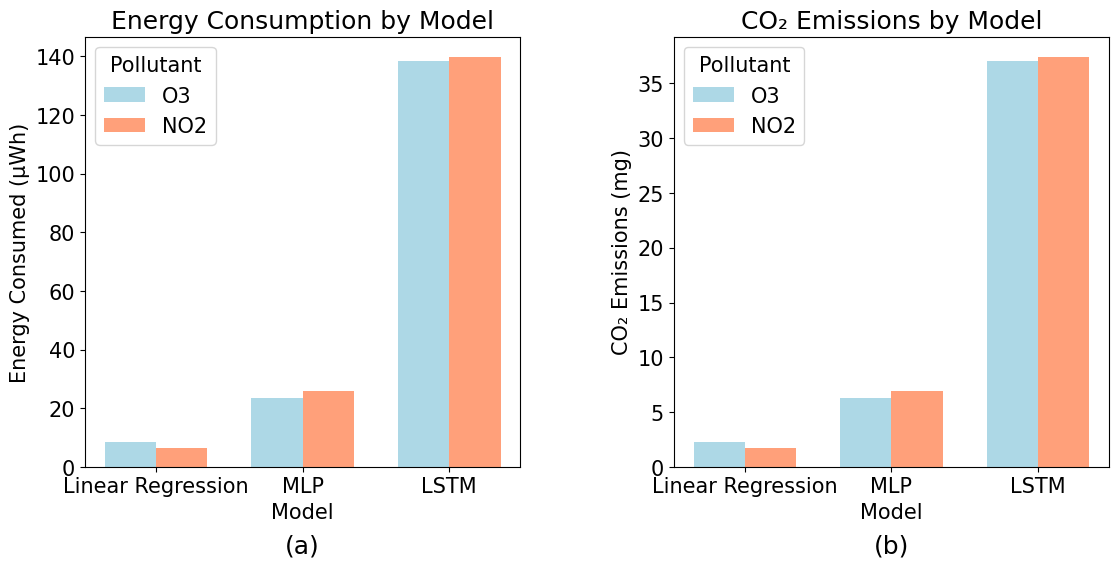

In [113]:
import matplotlib.pyplot as plt
import numpy as np

pollutant_colors = {'NO2': 'lightsalmon', 'O3': 'lightblue'}

models = data['model'].unique()
width = 0.35 

plt.rcParams.update({'font.size': 15})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Energy Consumption bar chart (left)
for i, pollutant in enumerate(data['pollutant'].unique()):
    subset = data[data['pollutant'] == pollutant]
    ax1.bar(np.arange(len(models)) + i * width, subset['energy_consumed'], 
            width=width, color=pollutant_colors[pollutant], label=pollutant)
ax1.set_xlabel('Model')
ax1.set_ylabel('Energy Consumed (µWh)')
ax1.set_title('Energy Consumption by Model')
ax1.set_xticks(np.arange(len(models)) + width / 2)
ax1.set_xticklabels(models)
ax1.legend(title="Pollutant")
ax1.text(0.5, -0.2, '(a)', fontsize=18, transform=ax1.transAxes, ha='center')

# CO₂ Emissions bar chart (right)
for i, pollutant in enumerate(data['pollutant'].unique()):
    subset = data[data['pollutant'] == pollutant]
    ax2.bar(np.arange(len(models)) + i * width, subset['emissions'], 
            width=width, color=pollutant_colors[pollutant], label=pollutant)
ax2.set_xlabel('Model')
ax2.set_ylabel('CO₂ Emissions (mg)')
ax2.set_title('CO₂ Emissions by Model')
ax2.set_xticks(np.arange(len(models)) + width / 2)
ax2.set_xticklabels(models)
ax2.legend(title="Pollutant")
ax2.text(0.5, -0.2, '(b)', fontsize=18, transform=ax2.transAxes, ha='center')


plt.subplots_adjust(wspace=15)
plt.tight_layout()
plt.show()
